# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we consider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two random variables, denoting age and weight, respectively.
Consider a random sample of size $n=20$ from these two variables

In [2]:
X = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

**a)** Find the mean, median and mode for $X$  

In [4]:
np.mean(X)

71.45

**b)** What is the variance for $Y$?  

In [5]:
np.var(Y)

1369.2099999999998

**c)** What is the probability of observing an age of 80 or higher?  

In [10]:
count = np.count_nonzero(X > 80)
np.divide(count, len(X))

0.0

**d)** Plot the normal distribution for $X$. Consider if the data seems to fit a normal distribution.  

(array([4, 2, 1, 3, 2, 0, 5, 2, 0, 1]), array([66. , 67.3, 68.6, 69.9, 71.2, 72.5, 73.8, 75.1, 76.4, 77.7, 79. ]))


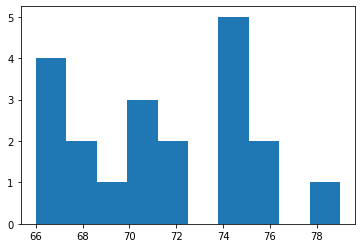

In [16]:
print(np.histogram(X))
plt.hist(X)
plt.show()

**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [21]:
print("2-dimensional mean: ",np.mean(X, keepdims = 2)) #???
print(" covariance matrix: ",np.cov(X, Y))

2-dimensional mean:  [71.45]
 covariance matrix:  [[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

In [30]:
normal_array = (X - np.min(X)) / (np.max(X) - np.min(X))
print(normal_array)

[0.23076923 0.61538462 0.15384615 0.30769231 0.46153846 0.07692308
 0.         0.30769231 0.76923077 0.15384615 0.46153846 1.
 0.61538462 0.07692308 0.         0.38461538 0.61538462 0.69230769
 0.69230769 0.76923077]


**g)** Normalize the data with _standard score normalization_, such that is has mean 0 and standard deviation 1.  

In [34]:
scipy.stats.zscore(X)

array([-0.65838571,  0.6852586 , -0.92711457, -0.38965685,  0.14780087,
       -1.19584344, -1.4645723 , -0.38965685,  1.22271632, -0.92711457,
        0.14780087,  2.02890291,  0.6852586 , -1.19584344, -1.4645723 ,
       -0.12092799,  0.6852586 ,  0.95398746,  0.95398746,  1.22271632])

## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers 
 
      **False**: We say that a statistic is robust if it is not affected by extreme values (such as outliers) in the data. The sample mean is unfortunately not robust because a single large value (an outlier) can skew the average.
 
 <em>Data Mining and Analysis Page 47</em>
 - Median is robust against outliers
 
      **True：** It is not affected by extreme values

- Standard deviation is robust against outliers

    **False**: Standard deviation $\sigma = \sqrt\frac{\sum(x_i-\mu)^2}{N}$, it could influenced by each $x_i$

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

**Answer:** statistic is robust if it is not affected by extreme values

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 

**Answer:** The main idea is to set up a hypothesis testing framework, where the null hypothesis H0 is that X1 and X2 are independent, and the alternative hypothesis H1 is that they are dependent. We then compute the value of the chi-square statistic χ2 under the null hypothesis. Depending on the p-value, we either accept or reject the null hypothesis; in the latter case the attributes are considered to be dependent.

<em>Data Mining and Analysis Page 78</em>

## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.11](graphics/3.11.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes . Include the marginal counts.  
**b)** Compute the $\chi^2$ statistic between them.  
**c)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.10](graphics/3.10.png)

**Answer:**

**a)**
Table: observed contingency table

| $\frac{X_1}{X_2}$  | [-2,-0.5] | [-0.5,0.5] | [0.5, 2] |row counts|
|---|-----------|------------|----------|----|
| a | 2         | 4          |          | 6  |
| b | 1         | 1          | 2        | 4  |
| column counts  | 3         | 5          | 2        | 10 |



**b)**

Table: Expectation table

| $\frac{X_1}{X_2}$  | [-2,-0.5] | [-0.5,0.5] | [0.5, 2] |row counts|
|---|-----------|------------|----------|----|
| a | 1.8         |3          |1.2       | 6  |
| b | 1.2         | 2          |0.8         | 4  |
| column counts  | 3         | 5          | 2        | 10 |

Table: $X^2$

| $\frac{X_1}{X_2}$  | [-2,-0.5] | [-0.5,0.5] | [0.5, 2] |row counts|
|---|-----------|------------|----------|----|
| a | 0.022        |0.333          |0       | 6  |
| b | 0.033        |0.500           |1.8         | 4  |
| column counts  | 3         | 5          | 2        | 10 |

null hypothesis $H_0$, $X_1$ and $X_2$ are independent

$X^2 = $$\sum_{i=1}^m_1\sum_{j=1}^m_2 \frac{(n_ij-e_ij)^2}{e_ij}}$

$X^2 = 0.022+0.333+0+0.333+0.5+1.8 = 2.988$

degree of freedom: $q = (2-1)*(3-1) = 2$

cirtical value $= 5.991$

$X^2 \le 5.991 $ it accept the null hypothesis

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances? 
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$? 

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

**Answer:** No, it could influenced by each $x_i$

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. If we know that the correlation between $X$
and $Y$ is zero, what can you infer about the values of $Y$? (Find a relationship between a, b and c)

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.
**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.11](graphics/3.11.png)



**a)** $ /mu = (a,b) = (-0.9, 0.8)$

**b)**